# LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bondora_Features_Selection_File.csv')

In [ ]:
df.head()

,Unnamed: 0,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       134529 non-null  int64  
 1   BidsPortfolioManager             134529 non-null  int64  
 2   Interest                         134529 non-null  float64
 3   MonthlyPayment                   134529 non-null  float64
 4   Rating                           134529 non-null  int64  
 5   PrincipalPaymentsMade            134529 non-null  float64
 6   NoOfPreviousLoansBeforeLoan      134529 non-null  int64  
 7   PrincipalBalance                 134529 non-null  float64
 8   InterestAndPenaltyBalance        134529 non-null  float64
 9   AmountOfPreviousLoansBeforeLoan  134529 non-null  float64
 10  PreviousRepaymentsBeforeLoan     134529 non-null  float64
 11  Target                           134529 non-null  int64  
dtypes:

In [ ]:
df.shape

(134529, 12)

In [ ]:
df.describe()

,Unnamed: 0,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
count,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000
mean,67264.000000,966.452876,35.889583,119.083443,4.169547,761.476162,1.487620,1769.281104,701.567107,2868.652401,928.395548,0.319002
std,38835.321519,1355.686016,26.288644,111.850802,1.910316,1371.557801,2.396148,2030.546309,2514.595572,4507.046575,1683.132260,0.466091
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000
25%,33632.000000,155.000000,20.000000,37.380000,3.000000,50.870000,0.000000,212.820000,0.000000,0.000000,54.790000,0.000000
50%,67264.000000,465.000000,30.930000,103.100000,4.000000,208.100000,1.000000,1061.990000,0.000000,396.354100,711.240000,0.000000
75%,100896.000000,1218.000000,40.400000,153.100000,6.000000,766.410000,2.000000,2636.330000,202.900000,4250.000000,928.395548,1.000000
max,134528.000000,10625.000000,264.310000,2368.540000,7.000000,10632.000000,25.000000,10632.000000,64494.770000,53762.000000,34077.420000,1.000000


CHECK MISS VALUES

In [ ]:
print(str('Any missing data or NaN in the dataset:'),df.isnull().values.any())

Any missing data or NaN in the dataset: False


In [ ]:
import seaborn as sns

CORRELATION MAP

                                 Unnamed: 0  BidsPortfolioManager  Interest  \
Unnamed: 0                         1.000000             -0.362972 -0.058840   
BidsPortfolioManager              -0.362972              1.000000 -0.066076   
Interest                          -0.058840             -0.066076  1.000000   
MonthlyPayment                    -0.090296              0.327921  0.249838   
Rating                            -0.051880              0.014476  0.684206   
PrincipalPaymentsMade             -0.237535              0.479090 -0.091495   
NoOfPreviousLoansBeforeLoan        0.049575             -0.135164 -0.298218   
PrincipalBalance                   0.275614              0.195994  0.005466   
InterestAndPenaltyBalance         -0.168967              0.342716  0.182129   
AmountOfPreviousLoansBeforeLoan    0.086134             -0.096871 -0.298889   
PreviousRepaymentsBeforeLoan      -0.033452              0.010278 -0.116620   
Target                            -0.381901         

<Axes: >

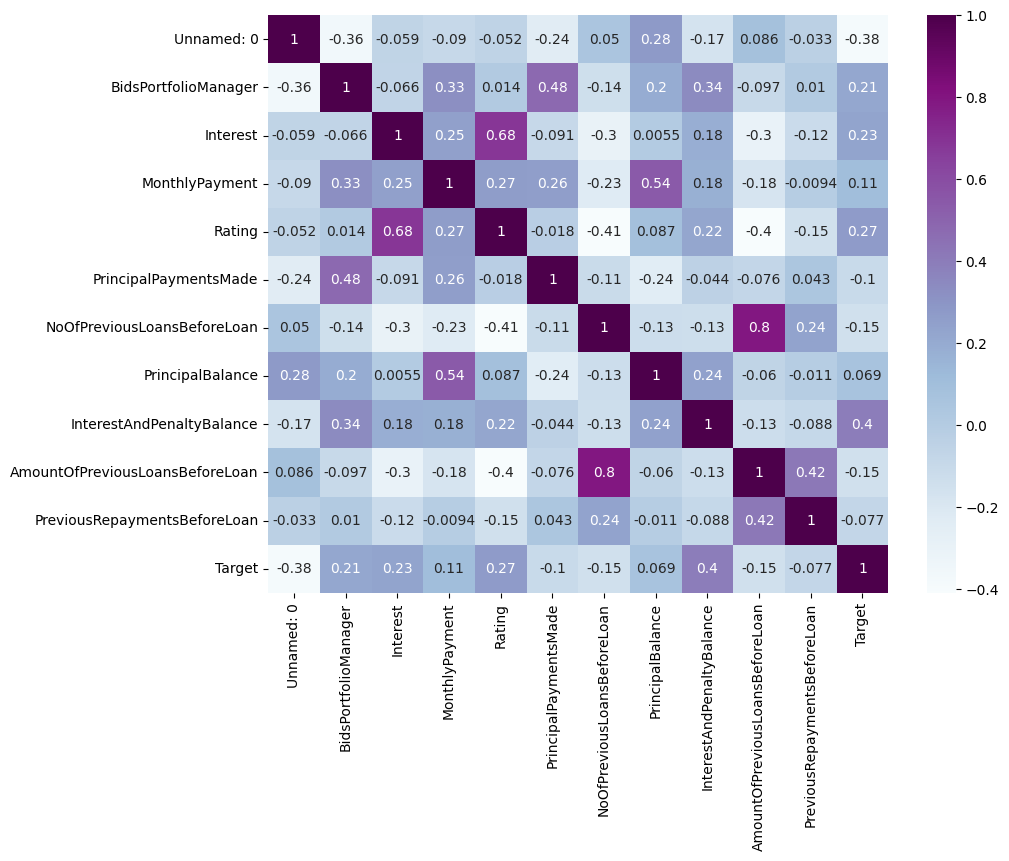

In [ ]:
corr_var=df.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [ ]:
df.iloc[:,:-1]

,Unnamed: 0,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan
0,0,0,30.00,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000
1,1,0,25.00,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256
2,2,0,25.00,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000
3,3,0,45.00,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000
4,4,0,30.00,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
134524,134524,2515,31.01,107.680000,5,2308.1900,0,0.00,0.00,0.0000,0.0000
134525,134525,1880,18.25,85.330000,2,3000.0000,1,0.00,0.00,3000.0000,389.3600
134526,134526,1975,24.83,80.420000,4,1869.7600,0,630.24,1227.98,0.0000,0.0000
134527,134527,1840,17.74,84.510000,2,2257.5400,1,0.00,0.00,500.0000,96.8000


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.iloc[:,:-1]

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan
0,0,30.00,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000
1,0,25.00,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256
2,0,25.00,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000
3,0,45.00,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000
4,0,30.00,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000
...,...,...,...,...,...,...,...,...,...,...
134524,2515,31.01,107.680000,5,2308.1900,0,0.00,0.00,0.0000,0.0000
134525,1880,18.25,85.330000,2,3000.0000,1,0.00,0.00,3000.0000,389.3600
134526,1975,24.83,80.420000,4,1869.7600,0,630.24,1227.98,0.0000,0.0000
134527,1840,17.74,84.510000,2,2257.5400,1,0.00,0.00,500.0000,96.8000


In [ ]:
df.iloc[:,-1]

0         0
1         0
2         1
3         0
4         1
         ..
134524    1
134525    0
134526    1
134527    1
134528    1
Name: Target, Length: 134529, dtype: int64

DATA SLICES INTO X AND Y

In [ ]:
df.columns

Index(['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'Target'],
      dtype='object')

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X.shape

(134529, 10)

In [ ]:
y.shape

(134529,)

<Axes: xlabel='Target', ylabel='count'>

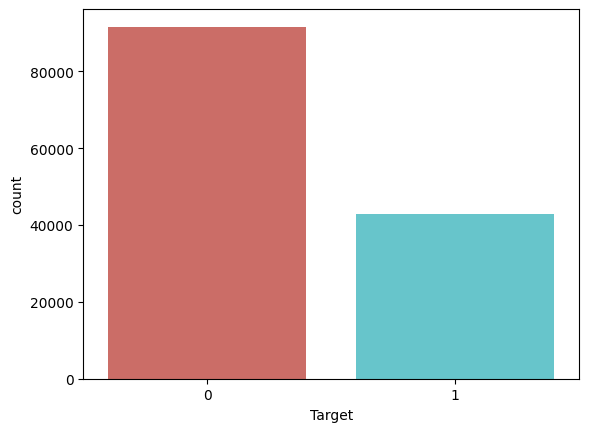

In [ ]:
import seaborn as sns
sns.countplot(x='Target',data=df,palette='hls')

PERFORM TRAIN TEST SPLIT IN 80 TO 20 RATIO

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (107623, 10)
y_train: (107623,)
X_test: (26906, 10)
y_test: (26906,)


SCALING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

IMPORT LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
parameters = model.coef_
print(parameters)

[[ 8.52801062e-01 -2.92857879e-01 -2.38034329e-02  2.45977857e-01
  -8.06294674e-01 -7.65502679e-02 -3.61065013e+00  4.62107113e+01
   8.43951268e-02 -8.47494614e-02]]


PREDICTING THE VALUES WITH MODEL

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [1 1]]


CHECKING PREDICATED AND EXPECTED VALUES

Y_TEST= EXPECTED VALUE
Y_PRED= PREDICTED VALUE

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18212   132]
 [ 1953  6609]]


CONFUSION MATRIX

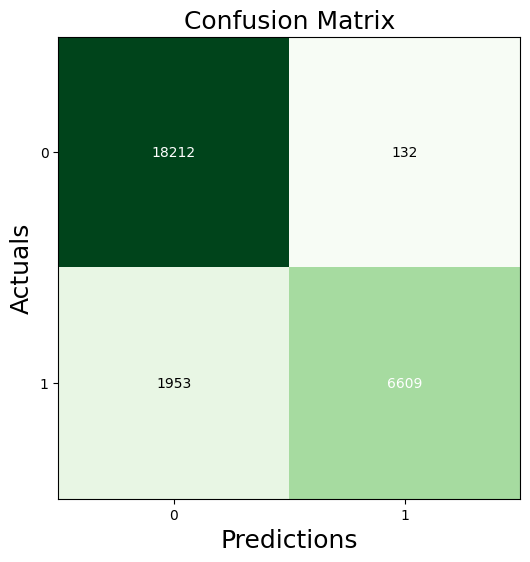

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

ACCURRACY OF MODEL

In [ ]:
logreg=accuracy_score(y_test,y_pred)
logreg

0.922507990782725

Text(0.5, 1.0, 'Accuracy Score: 0.922507990782725')

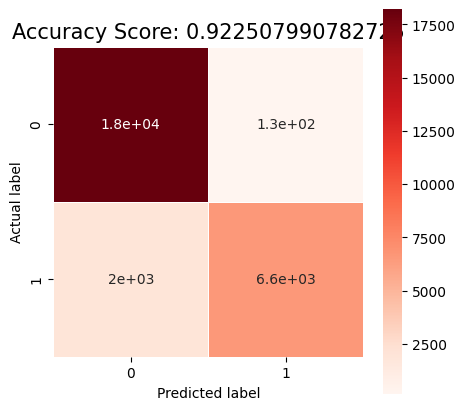

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

ROC-AUC SCORE

In [ ]:
roc_auc_score(y_test, y_pred)

0.8823516378264674

ROC CURVE

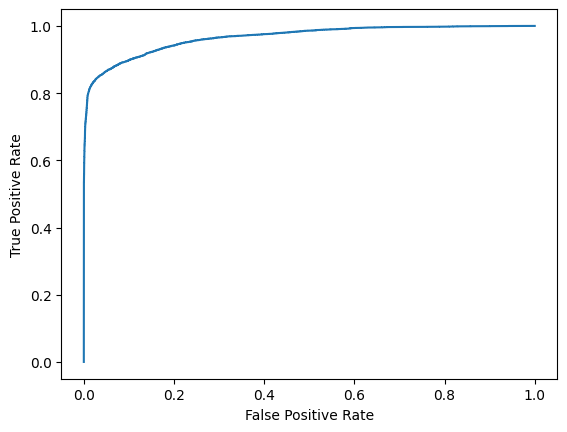

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
#define metrics
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AREA UNDER CURVE

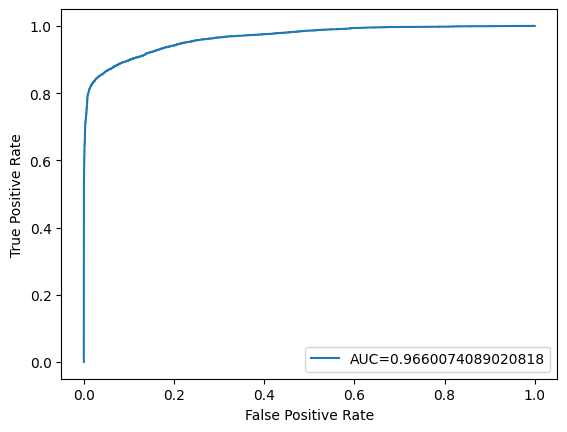

In [ ]:
#define metrics
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

CLASSIFICATION REPORT

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     18344
           1       0.98      0.77      0.86      8562

    accuracy                           0.92     26906
   macro avg       0.94      0.88      0.90     26906
weighted avg       0.93      0.92      0.92     26906



ELIGIBILITY OF MODELS

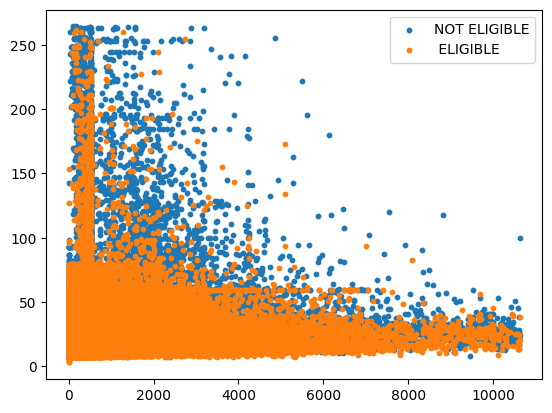

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":


    # X = feature values, all the columns except the last column
    X = df.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = df.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = df.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = df.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='NOT ELIGIBLE')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label=' ELIGIBLE')
    plt.legend()
    plt.show()

HYPERPARAMTER TUNING

REGULARIZATION

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = model,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best Accuracy of LR: 92.47 %
Best Parameter of LR: {'C': 1000, 'penalty': 'l2'}


In [ ]:
# re-training the Logistic Regression Classifier with the best hyper-parameter, C = 10
model = LogisticRegression(C = 12).fit(X_train, y_train)

In [ ]:
# getting the Training Set Predictions
y_train_pred = model.predict(X_train)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test)

In [ ]:
# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.9241983590868122
Test Accuracy of the Model:  0.9264476324983275

Training Precision of the Model:  0.9773663301381347
Test Precision of the Model:  0.979740562600204

Training Recall of the Model:  0.7806014030797892
Test Recall of the Model:  0.7850969399672973

Training F1-Score of the Model:  0.867972163780547
Test F1-Score of the Model:  0.8716851455618232



In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18344
           1       0.98      0.79      0.87      8562

    accuracy                           0.93     26906
   macro avg       0.94      0.89      0.91     26906
weighted avg       0.93      0.93      0.92     26906



In [ ]:
model.intercept_

array([-0.06911689])

In [ ]:
model.coef_

array([[ 5.99867588e-04, -1.59642786e-02, -5.87394085e-04,
        -1.87199421e-02, -6.54044272e-04, -1.17780666e-01,
        -2.58647402e-03,  2.60007797e-02,  1.83715413e-05,
        -8.96453317e-05]])

In [ ]:
roc_auc_score(y_test, y_test_pred)

0.8887597652300507

In [ ]:
import numpy as np


In [ ]:
df.head()

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
df.columns

Index(['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'Target'],
      dtype='object')

In [ ]:
df.head()

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


READING DATA FROM USER TO FORM A DATAFRAME

In [ ]:
import pandas as pd

d1 = pd.DataFrame(columns=['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       ])
parts = int(input("Enter the number of day rows:"))

for _ in range(parts):
    a = input("Enter BidsPortfolioManager:: ")
    b = input("Enter Interest:: ")
    c = input("Enter  MonthlyPayment:: ")
    d = input("Enter Rating:: ")
    e = input("Enter PrincipalPaymentsMade:: ")
    f = input("Enter NoOfPreviousLoansBeforeLoan:: ")
    g = input("Enter  PrincipalBalance:: ")
    h = input("Enter  InterestAndPenaltyBalance:: ")
    i = input("Enter  AmountOfPreviousLoansBeforeLoan:: ")
    j = input("Enter  PreviousRepaymentsBeforeLoan:: ")

    d2 = pd.DataFrame(data=[[a,b,c,d,e,f,g,h,i,j]],columns=['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       ])
    data = pd.concat([d1,d2], axis=0)

data.index = range(len(data.index))
data

Enter the number of day rows:1
Enter BidsPortfolioManager:: 0
Enter Interest:: 45.0
Enter  MonthlyPayment:: 119.083443
Enter Rating:: 5
Enter PrincipalPaymentsMade:: 319.5436
Enter NoOfPreviousLoansBeforeLoan:: 2
Enter  PrincipalBalance:: 0.00
Enter  InterestAndPenaltyBalance:: 0.00
Enter  AmountOfPreviousLoansBeforeLoan:: 134.2144
Enter  PreviousRepaymentsBeforeLoan:: 0.0000


,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan
0,0,45.0,119.083443,5,319.5436,2,0.00,0.00,134.2144,0.0000


In [ ]:
data.head()

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan
0,0,45.0,119.083443,5,319.5436,2,0.00,0.00,134.2144,0.0000


SPLIT TRAIN AND TEST DATA

In [ ]:
#train_input=data.iloc[:,:-1].values
#Expected_output=data.iloc[:,-1].values
train_input=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

In [ ]:
train_input

array([['0', '45.0', '119.083443', '5', '319.5436', '2', '0.00', '0.00',
        '134.2144', '0.0000']], dtype=object)

PREDICT THE OUTPUT WITH LOGISTIC REGRESSION

In [ ]:
predict= model.predict(train_input)
print(predict)

[0]
